# Mariana Diaz Puentes y Fernando Lizarazo

In [ ]:
# Instalar paquetes necesarios
if(!require(glmnet)) install.packages("glmnet", repos='http://cran.us.r-project.org')
if(!require(caret)) install.packages("caret", repos='http://cran.us.r-project.org')
if(!require(dplyr)) install.packages("dplyr", repos='http://cran.us.r-project.org')
if(!require(stringr)) install.packages("stringr", repos='http://cran.us.r-project.org')
if(!require(ggplot2)) install.packages("ggplot2", repos='http://cran.us.r-project.org')
if(!require(gridExtra)) install.packages("gridExtra", repos='http://cran.us.r-project.org')
if(!require(MASS)) install.packages("MASS", repos='http://cran.us.r-project.org')
if(!require(car)) install.packages("car", repos='http://cran.us.r-project.org')
if(!require(Metrics)) install.packages("Metrics", repos='http://cran.us.r-project.org')
if(!require(Hmisc)) install.packages("Hmisc", repos='http://cran.us.r-project.org')


library(glmnet)
library(caret)
library(dplyr)
library(stringr)
library(ggplot2)
library(gridExtra)
library(MASS)
library(car)
library(Metrics)
library(Hmisc)

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: car

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘car’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Loading required package: Metrics

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘Metrics’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Hmisc

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, 

In [ ]:
# 2. Leer el dataset
df3 <- read.csv("/content/loan_data_train.csv")

# 3. Revisar estructura y nombres
names(df3) <- make.names(names(df3))
str(df3)


'data.frame':	2200 obs. of  15 variables:
 $ ID                            : int  79542 75473 67265 80167 17240 32737 71685 38028 32119 84563 ...
 $ Amount.Requested              : chr  "25000" "19750" "2100" "28000" ...
 $ Amount.Funded.By.Investors    : chr  "25000" "19750" "2100" "28000" ...
 $ Interest.Rate                 : chr  "18.49%" "17.27%" "14.33%" "16.29%" ...
 $ Loan.Length                   : chr  "60 months" "60 months" "36 months" "36 months" ...
 $ Loan.Purpose                  : chr  "debt_consolidation" "debt_consolidation" "major_purchase" "credit_card" ...
 $ Debt.To.Income.Ratio          : chr  "27.56%" "13.39%" "3.50%" "19.62%" ...
 $ State                         : chr  "VA" "NY" "LA" "NV" ...
 $ Home.Ownership                : chr  "MORTGAGE" "MORTGAGE" "OWN" "MORTGAGE" ...
 $ Monthly.Income                : num  8607 6738 1000 7083 5833 ...
 $ FICO.Range                    : chr  "720-724" "710-714" "690-694" "710-714" ...
 $ Open.CREDIT.Lines             : c

In [ ]:
# Función para calcular la moda (valor más frecuente)
Mode <- function(x) {
  ux <- unique(x)
  ux[which.max(tabulate(match(x, ux)))]
}

In [ ]:
# 4. Tratamiento de datos faltantes y limpieza
# Llenar Employment_Length con moda
df3$Employment.Length[is.na(df1$Employment.Length)] <- as.character(Mode(df3$Employment.Length))


# Eliminar registros con NA
df3 <- na.omit(df3)


In [ ]:
names(df3)  # Para confirmar los nombres válidos


[1] "ID"                             "Amount.Requested"              
 [3] "Amount.Funded.By.Investors"     "Interest.Rate"                 
 [5] "Loan.Length"                    "Loan.Purpose"                  
 [7] "Debt.To.Income.Ratio"           "State"                         
 [9] "Home.Ownership"                 "Monthly.Income"                
[11] "FICO.Range"                     "Open.CREDIT.Lines"             
[13] "Revolving.CREDIT.Balance"       "Inquiries.in.the.Last.6.Months"
[15] "Employment.Length"

In [ ]:
#Convertir en numerico
df3$Amount.Requested <- as.numeric(as.character(df3$Amount.Requested))
df3$Amount.Funded.By.Investors <- as.numeric(as.character(df3$Amount.Funded.By.Investors))
df3$Open.CREDIT.Lines <- as.numeric(as.character(df3$Open.CREDIT.Lines))
df3$Revolving.CREDIT.Balance <- as.numeric(as.character(df3$Revolving.CREDIT.Balance))
df3$Inquiries.in.the.Last.6.Months <- as.numeric(as.character(df3$Inquiries.in.the.Last.6.Months))


Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”


In [ ]:
str(df3)

'data.frame':	2186 obs. of  15 variables:
 $ ID                            : int  79542 75473 67265 80167 17240 32737 71685 38028 32119 84563 ...
 $ Amount.Requested              : num  25000 19750 2100 28000 24250 ...
 $ Amount.Funded.By.Investors    : num  25000 19750 2100 28000 17432 ...
 $ Interest.Rate                 : chr  "18.49%" "17.27%" "14.33%" "16.29%" ...
 $ Loan.Length                   : chr  "60 months" "60 months" "36 months" "36 months" ...
 $ Loan.Purpose                  : chr  "debt_consolidation" "debt_consolidation" "major_purchase" "credit_card" ...
 $ Debt.To.Income.Ratio          : chr  "27.56%" "13.39%" "3.50%" "19.62%" ...
 $ State                         : chr  "VA" "NY" "LA" "NV" ...
 $ Home.Ownership                : chr  "MORTGAGE" "MORTGAGE" "OWN" "MORTGAGE" ...
 $ Monthly.Income                : num  8607 6738 1000 7083 5833 ...
 $ FICO.Range                    : chr  "720-724" "710-714" "690-694" "710-714" ...
 $ Open.CREDIT.Lines             : num  

In [ ]:
# Employment_Length a numérico
df3$Employment.Length <- gsub("<|\\+| years| year", "", df3$Employment.Length)
df3$Employment.Length <- as.numeric(df3$Employment.Length)



In [ ]:
str(df3)

'data.frame':	2186 obs. of  15 variables:
 $ ID                            : int  79542 75473 67265 80167 17240 32737 71685 38028 32119 84563 ...
 $ Amount.Requested              : num  25000 19750 2100 28000 24250 ...
 $ Amount.Funded.By.Investors    : num  25000 19750 2100 28000 17432 ...
 $ Interest.Rate                 : chr  "18.49%" "17.27%" "14.33%" "16.29%" ...
 $ Loan.Length                   : chr  "60 months" "60 months" "36 months" "36 months" ...
 $ Loan.Purpose                  : chr  "debt_consolidation" "debt_consolidation" "major_purchase" "credit_card" ...
 $ Debt.To.Income.Ratio          : chr  "27.56%" "13.39%" "3.50%" "19.62%" ...
 $ State                         : chr  "VA" "NY" "LA" "NV" ...
 $ Home.Ownership                : chr  "MORTGAGE" "MORTGAGE" "OWN" "MORTGAGE" ...
 $ Monthly.Income                : num  8607 6738 1000 7083 5833 ...
 $ FICO.Range                    : chr  "720-724" "710-714" "690-694" "710-714" ...
 $ Open.CREDIT.Lines             : num  

In [ ]:
# Corregir guiones especiales primero
df3$FICO.Range <- gsub("–", "-", df3$FICO.Range)

# Dividir la columna
fico_split <- strsplit(as.character(df3$FICO.Range), "-")

# Asegurar que todos tengan 2 partes
valid_split <- sapply(fico_split, length) == 2
fico_vals <- do.call(rbind, fico_split[valid_split])

# Asignar solo donde hay datos válidos
df3$Min_Fic <- NA
df3$Max_Fic <- NA
df3$Min_Fic[valid_split] <- as.numeric(fico_vals[, 1])
df3$Max_Fic[valid_split] <- as.numeric(fico_vals[, 2])
df3$Fico_Mean <- (df3$Min_Fic + df3$Max_Fic) / 2


In [ ]:
str(df3)

'data.frame':	2186 obs. of  18 variables:
 $ ID                            : int  79542 75473 67265 80167 17240 32737 71685 38028 32119 84563 ...
 $ Amount.Requested              : num  25000 19750 2100 28000 24250 ...
 $ Amount.Funded.By.Investors    : num  25000 19750 2100 28000 17432 ...
 $ Interest.Rate                 : chr  "18.49%" "17.27%" "14.33%" "16.29%" ...
 $ Loan.Length                   : chr  "60 months" "60 months" "36 months" "36 months" ...
 $ Loan.Purpose                  : chr  "debt_consolidation" "debt_consolidation" "major_purchase" "credit_card" ...
 $ Debt.To.Income.Ratio          : chr  "27.56%" "13.39%" "3.50%" "19.62%" ...
 $ State                         : chr  "VA" "NY" "LA" "NV" ...
 $ Home.Ownership                : chr  "MORTGAGE" "MORTGAGE" "OWN" "MORTGAGE" ...
 $ Monthly.Income                : num  8607 6738 1000 7083 5833 ...
 $ FICO.Range                    : chr  "720-724" "710-714" "690-694" "710-714" ...
 $ Open.CREDIT.Lines             : num  

In [ ]:
# 6. Eliminar columnas innecesarias
df3 <- df3[, !(names(df) %in% c("ID", "FICO.Range", "Min_Fic", "Max_Fic"))]


In [ ]:
str(df3)

'data.frame':	2186 obs. of  15 variables:
 $ Amount.Requested              : num  25000 19750 2100 28000 24250 ...
 $ Amount.Funded.By.Investors    : num  25000 19750 2100 28000 17432 ...
 $ Interest.Rate                 : chr  "18.49%" "17.27%" "14.33%" "16.29%" ...
 $ Loan.Length                   : chr  "60 months" "60 months" "36 months" "36 months" ...
 $ Loan.Purpose                  : chr  "debt_consolidation" "debt_consolidation" "major_purchase" "credit_card" ...
 $ Debt.To.Income.Ratio          : chr  "27.56%" "13.39%" "3.50%" "19.62%" ...
 $ State                         : chr  "VA" "NY" "LA" "NV" ...
 $ Home.Ownership                : chr  "MORTGAGE" "MORTGAGE" "OWN" "MORTGAGE" ...
 $ Monthly.Income                : num  8607 6738 1000 7083 5833 ...
 $ Open.CREDIT.Lines             : num  11 14 13 12 6 2 5 11 24 7 ...
 $ Revolving.CREDIT.Balance      : num  15210 19070 893 38194 31061 ...
 $ Inquiries.in.the.Last.6.Months: num  3 3 1 1 2 2 0 1 0 1 ...
 $ Employment.Length  

In [ ]:
# 1. Eliminar el símbolo % y convertir a numérico
df3$Interest.Rate <- as.numeric(gsub("%", "", df3$Interest.Rate))

# 2. Extraer número de meses desde "36 months", "60 months", etc.
df3$Loan.Length <- as.numeric(stringr::str_extract(df3$Loan.Length, "\\d+"))

# 3. Eliminar % y convertir en numérico la razón deuda/ingreso
df3$Debt.To.Income.Ratio <- as.numeric(gsub("%", "", df3$Debt.To.Income.Ratio))


In [ ]:
str(df3)

'data.frame':	2186 obs. of  15 variables:
 $ Amount.Requested              : num  25000 19750 2100 28000 24250 ...
 $ Amount.Funded.By.Investors    : num  25000 19750 2100 28000 17432 ...
 $ Interest.Rate                 : num  18.5 17.3 14.3 16.3 12.2 ...
 $ Loan.Length                   : num  60 60 36 36 60 36 60 36 60 36 ...
 $ Loan.Purpose                  : chr  "debt_consolidation" "debt_consolidation" "major_purchase" "credit_card" ...
 $ Debt.To.Income.Ratio          : num  27.6 13.4 3.5 19.6 23.8 ...
 $ State                         : chr  "VA" "NY" "LA" "NV" ...
 $ Home.Ownership                : chr  "MORTGAGE" "MORTGAGE" "OWN" "MORTGAGE" ...
 $ Monthly.Income                : num  8607 6738 1000 7083 5833 ...
 $ Open.CREDIT.Lines             : num  11 14 13 12 6 2 5 11 24 7 ...
 $ Revolving.CREDIT.Balance      : num  15210 19070 893 38194 31061 ...
 $ Inquiries.in.the.Last.6.Months: num  3 3 1 1 2 2 0 1 0 1 ...
 $ Employment.Length             : num  10 10 10 10 10 10 10 1

In [ ]:
unique(df3$Home.Ownership)
unique(df3$State)
unique(df3$Loan.Purpose)


[1] "MORTGAGE" "OWN"      "RENT"     "OTHER"

[1] "VA" "NY" "LA" "NV" "OH" "CA" "IL" "NC" "NJ" "WA" "CT" "AK" "CO" "MA" "TX"
[16] "VT" "OK" "FL" "NH" "GA" "MN" "MD" "WY" "PA" "AL" "AZ" "SC" "MI" "OR" "RI"
[31] "NM" "MO" "WI" "KY" "UT" "AR" "WV" "DE" "MT" "KS" "DC" "SD" "HI" "IN" "MS"
[46] "."

[1] "debt_consolidation" "major_purchase"     "credit_card"       
 [4] "small_business"     "home_improvement"   "other"             
 [7] "car"                "moving"             "house"             
[10] "educational"        "vacation"           "wedding"           
[13] "medical"            "renewable_energy"

In [ ]:
str(df3)

'data.frame':	2186 obs. of  15 variables:
 $ Amount.Requested              : num  25000 19750 2100 28000 24250 ...
 $ Amount.Funded.By.Investors    : num  25000 19750 2100 28000 17432 ...
 $ Interest.Rate                 : num  18.5 17.3 14.3 16.3 12.2 ...
 $ Loan.Length                   : num  60 60 36 36 60 36 60 36 60 36 ...
 $ Loan.Purpose                  : chr  "debt_consolidation" "debt_consolidation" "major_purchase" "credit_card" ...
 $ Debt.To.Income.Ratio          : num  27.6 13.4 3.5 19.6 23.8 ...
 $ State                         : chr  "VA" "NY" "LA" "NV" ...
 $ Home.Ownership                : chr  "MORTGAGE" "MORTGAGE" "OWN" "MORTGAGE" ...
 $ Monthly.Income                : num  8607 6738 1000 7083 5833 ...
 $ Open.CREDIT.Lines             : num  11 14 13 12 6 2 5 11 24 7 ...
 $ Revolving.CREDIT.Balance      : num  15210 19070 893 38194 31061 ...
 $ Inquiries.in.the.Last.6.Months: num  3 3 1 1 2 2 0 1 0 1 ...
 $ Employment.Length             : num  10 10 10 10 10 10 10 1

In [ ]:
if(!require(tidyselect)) install.packages("tidyselect", repos='http://cran.us.r-project.org')
library(tidyselect)

In [ ]:
# Separar variables numéricas y categóricas
num_vars <- df3[, sapply(df3, is.numeric)]
cat_vars <- df3[, sapply(df3, Negate(is.numeric))]

# Variable dependiente
y_var <- df3$Interest.Rate

# Mostrar primeros valores y dimensiones
cat("Num_Vars (primeras 3 filas):\n")
print(head(num_vars, 3))
cat("Dimensiones:", dim(num_vars), "\n\n")

cat("Cat_Vars (primeras 3 filas):\n")
print(head(cat_vars, 3))
cat("Dimensiones:", dim(cat_vars), "\n\n")

cat("Y_Var (primeras 3 filas):\n")
print(head(y_var, 3))
cat("Dimensiones:", length(y_var), "\n")


Num_Vars (primeras 3 filas):
  Amount.Requested Amount.Funded.By.Investors Interest.Rate Loan.Length
1            25000                      25000         18.49          60
2            19750                      19750         17.27          60
3             2100                       2100         14.33          36
  Debt.To.Income.Ratio Monthly.Income Open.CREDIT.Lines
1                27.56        8606.56                11
2                13.39        6737.50                14
3                 3.50        1000.00                13
  Revolving.CREDIT.Balance Inquiries.in.the.Last.6.Months Employment.Length
1                    15210                              3                10
2                    19070                              3                10
3                      893                              1                10
  Max_Fic Fico_Mean
1     724       722
2     714       712
3     694       692
Dimensiones: 2186 12 

Cat_Vars (primeras 3 filas):
        Loan.Purpose St

In [ ]:
names(cat_vars)


[1] "Loan.Purpose"   "State"          "Home.Ownership"

In [ ]:
# Asegurar que dplyr esté cargado
library(dplyr)




In [ ]:
# Eliminar 'State' del conjunto categórico si existe
if ("State" %in% names(cat_vars)) {
  cat_vars <- cat_vars %>% dplyr::select(-all_of("State"))
}

# Eliminar 'Interest.Rate' del conjunto numérico si existe
if ("Interest.Rate" %in% names(num_vars)) {
  num_vars <- num_vars %>% dplyr::select(-all_of("Interest.Rate"))
}


In [ ]:
# Información general del dataframe Num_Vars
str(num_vars)
summary(num_vars)



'data.frame':	2186 obs. of  11 variables:
 $ Amount.Requested              : num  25000 19750 2100 28000 24250 ...
 $ Amount.Funded.By.Investors    : num  25000 19750 2100 28000 17432 ...
 $ Loan.Length                   : num  60 60 36 36 60 36 60 36 60 36 ...
 $ Debt.To.Income.Ratio          : num  27.6 13.4 3.5 19.6 23.8 ...
 $ Monthly.Income                : num  8607 6738 1000 7083 5833 ...
 $ Open.CREDIT.Lines             : num  11 14 13 12 6 2 5 11 24 7 ...
 $ Revolving.CREDIT.Balance      : num  15210 19070 893 38194 31061 ...
 $ Inquiries.in.the.Last.6.Months: num  3 3 1 1 2 2 0 1 0 1 ...
 $ Employment.Length             : num  10 10 10 10 10 10 10 10 10 10 ...
 $ Max_Fic                       : num  724 714 694 714 734 789 669 739 744 769 ...
 $ Fico_Mean                     : num  722 712 692 712 732 787 667 737 742 767 ...


 Amount.Requested Amount.Funded.By.Investors  Loan.Length  
 Min.   : 1000    Min.   :   -0.01           Min.   :36.0  
 1st Qu.: 6000    1st Qu.: 6000.00           1st Qu.:36.0  
 Median :10000    Median :10000.00           Median :36.0  
 Mean   :12514    Mean   :12105.13           Mean   :41.2  
 3rd Qu.:17000    3rd Qu.:16350.00           3rd Qu.:36.0  
 Max.   :35000    Max.   :35000.00           Max.   :60.0  
 NA's   :4        NA's   :3                  NA's   :1     
 Debt.To.Income.Ratio Monthly.Income     Open.CREDIT.Lines
 Min.   : 0.000       Min.   :   588.5   Min.   : 2.00    
 1st Qu.: 9.752       1st Qu.:  3424.8   1st Qu.: 7.00    
 Median :15.235       Median :  5000.0   Median : 9.00    
 Mean   :15.391       Mean   :  5721.9   Mean   :10.09    
 3rd Qu.:20.677       3rd Qu.:  6833.3   3rd Qu.:13.00    
 Max.   :34.910       Max.   :102750.0   Max.   :38.00    
                                         NA's   :3        
 Revolving.CREDIT.Balance Inquiries.in.the.Last.

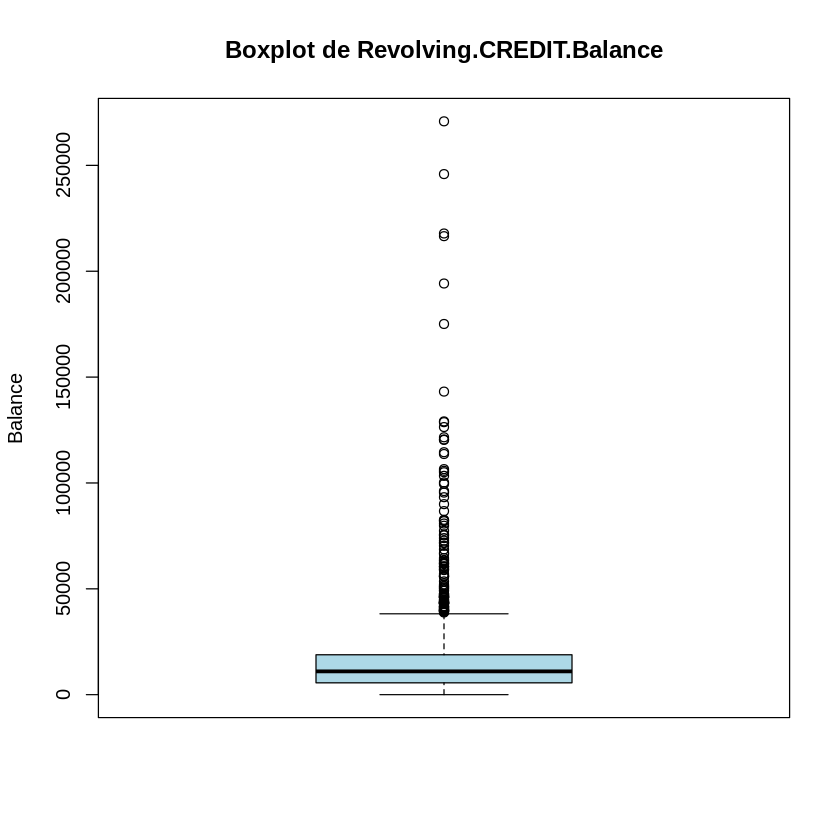

In [ ]:
# Boxplot de la variable 'Revolving.CREDIT.Balance'
boxplot(num_vars$Revolving.CREDIT.Balance,
        main = "Boxplot de Revolving.CREDIT.Balance",
        ylab = "Balance",
        col = "lightblue")

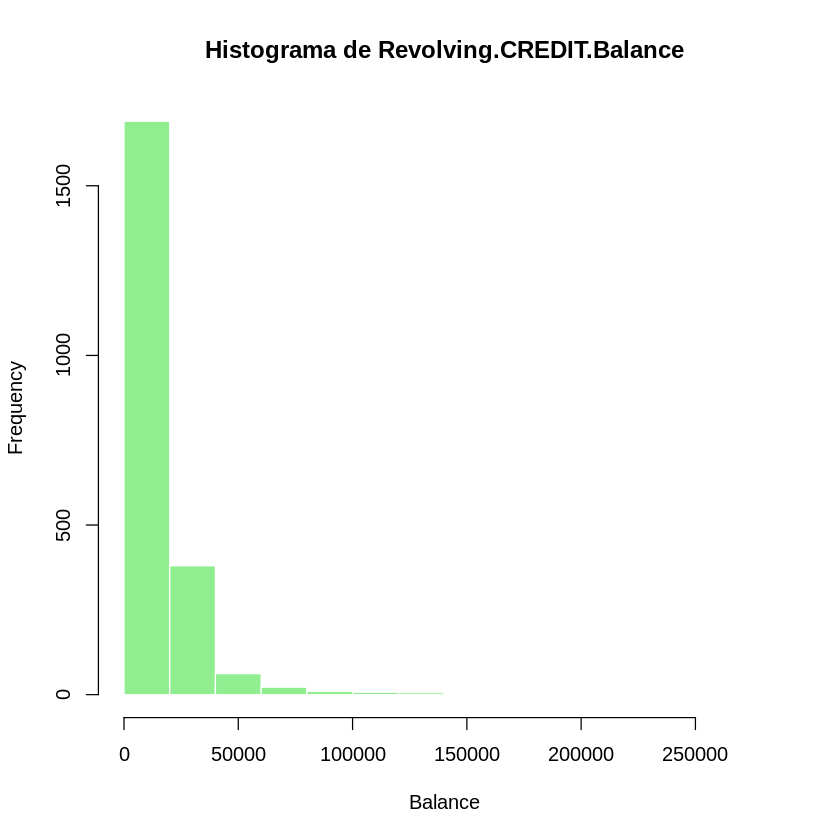

In [ ]:
# Histograma de Revolving.CREDIT.Balance
hist(num_vars$Revolving.CREDIT.Balance,
     main = "Histograma de Revolving.CREDIT.Balance",
     xlab = "Balance",
     col = "lightgreen",
     border = "white")


In [ ]:
outlier_missing_treatment <- function(x) {
  # Recorta los valores fuera del rango [5%, 95%]
  x <- pmin(pmax(x, quantile(x, 0.05, na.rm = TRUE)),
                 quantile(x, 0.95, na.rm = TRUE))
  # Rellena valores NA con la mediana
  x[is.na(x)] <- median(x, na.rm = TRUE)
  return(x)
}

# Aplicarlo a todas las columnas numéricas
num_vars <- as.data.frame(lapply(num_vars, outlier_missing_treatment))


In [ ]:
num_vars <- as.data.frame(lapply(num_vars, outlier_missing_treatment))


In [ ]:
str(num_vars)

'data.frame':	2186 obs. of  11 variables:
 $ Amount.Requested              : num  25000 19750 2800 28000 24250 ...
 $ Amount.Funded.By.Investors    : num  25000 19750 2208 27950 17432 ...
 $ Loan.Length                   : num  60 60 36 36 60 36 60 36 60 36 ...
 $ Debt.To.Income.Ratio          : num  27.6 13.4 3.5 19.6 23.8 ...
 $ Monthly.Income                : num  8607 6738 2167 7083 5833 ...
 $ Open.CREDIT.Lines             : num  11 14 13 12 6 4 5 11 18 7 ...
 $ Revolving.CREDIT.Balance      : num  15210 19070 1044 38194 31061 ...
 $ Inquiries.in.the.Last.6.Months: num  3 3 1 1 2 2 0 1 0 1 ...
 $ Employment.Length             : num  10 10 10 10 10 10 10 10 10 10 ...
 $ Max_Fic                       : num  724 714 694 714 734 779 669 739 744 769 ...
 $ Fico_Mean                     : num  722 712 692 712 732 777 667 737 742 767 ...


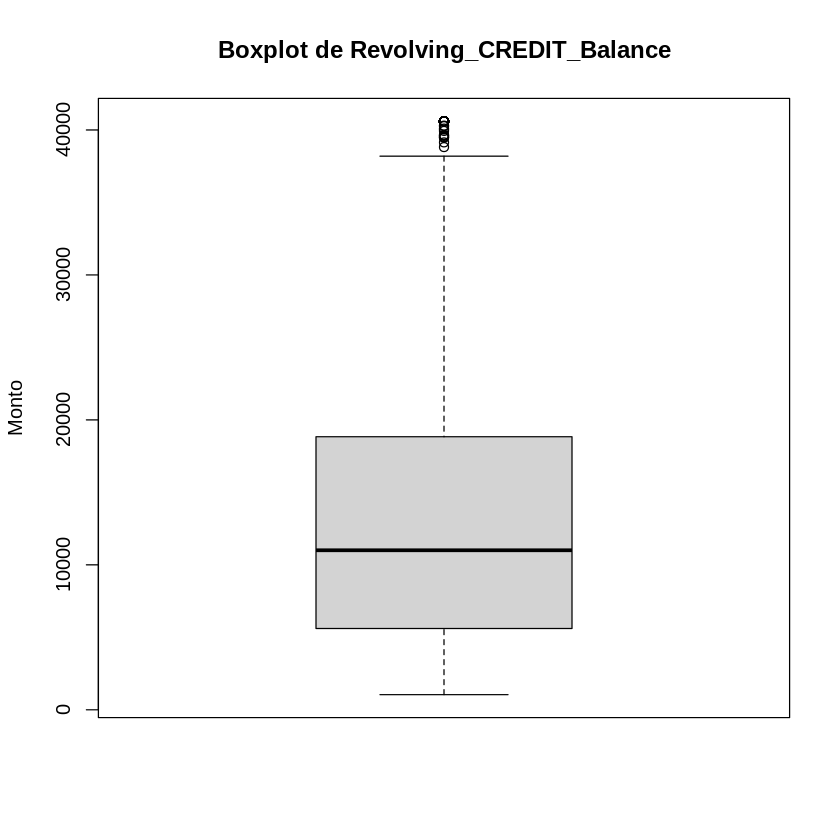

In [ ]:
boxplot(num_vars$Revolving.CREDIT.Balance,
        main = "Boxplot de Revolving_CREDIT_Balance",
        ylab = "Monto")


In [ ]:
library(Hmisc)

In [ ]:
# Definir función de moda manualmente
get_mode <- function(x) {
  ux <- unique(x)
  ux[which.max(tabulate(match(x, ux)))]
}

# Función para tratar NAs con la moda
Mode_treatment <- function(x) {
  mode_val <- as.character(get_mode(x[!is.na(x)]))
  x[is.na(x)] <- mode_val
  return(x)
}


In [ ]:
cat_vars <- as.data.frame(lapply(cat_vars, Mode_treatment))


In [ ]:
# Crear variables dummy
dummies <- dummyVars("~ .", data = cat_vars, fullRank = TRUE)
dummy_vars <- predict(dummies, newdata = cat_vars)

# Convertir a data frame
dummy_vars <- as.data.frame(dummy_vars)

# Ver los primeros valores
head(dummy_vars)


,Loan.Purposecredit_card,Loan.Purposedebt_consolidation,Loan.Purposeeducational,Loan.Purposehome_improvement,Loan.Purposehouse,Loan.Purposemajor_purchase,Loan.Purposemedical,Loan.Purposemoving,Loan.Purposeother,Loan.Purposerenewable_energy,Loan.Purposesmall_business,Loan.Purposevacation,Loan.Purposewedding,Home.OwnershipOTHER,Home.OwnershipOWN,Home.OwnershipRENT
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [ ]:
# Unir todas las variables (column bind)
df_final <- cbind(num_vars, dummy_vars, Interest_Rate = y_var)

# Mostrar las primeras filas
head(df_final)


,Amount.Requested,Amount.Funded.By.Investors,Loan.Length,Debt.To.Income.Ratio,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,Max_Fic,⋯,Loan.Purposemoving,Loan.Purposeother,Loan.Purposerenewable_energy,Loan.Purposesmall_business,Loan.Purposevacation,Loan.Purposewedding,Home.OwnershipOTHER,Home.OwnershipOWN,Home.OwnershipRENT,Interest_Rate
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,25000,25000.000,60,27.56,8606.56,11,15210.000,3,10,724,⋯,0,0,0,0,0,0,0,0,0,18.49
2,19750,19750.000,60,13.39,6737.50,14,19070.000,3,10,714,⋯,0,0,0,0,0,0,0,0,0,17.27
3,2800,2208.125,36,3.50,2166.67,13,1043.713,1,10,694,⋯,0,0,0,0,0,0,0,1,0,14.33
4,28000,27950.000,36,19.62,7083.33,12,38194.000,1,10,714,⋯,0,0,0,0,0,0,0,0,0,16.29
5,24250,17431.820,60,23.79,5833.33,6,31061.000,2,10,734,⋯,0,0,0,0,0,0,0,0,0,12.23
6,5400,5375.000,36,6.27,3000.00,4,1043.713,2,10,779,⋯,0,0,0,1,0,0,0,0,1,8.90


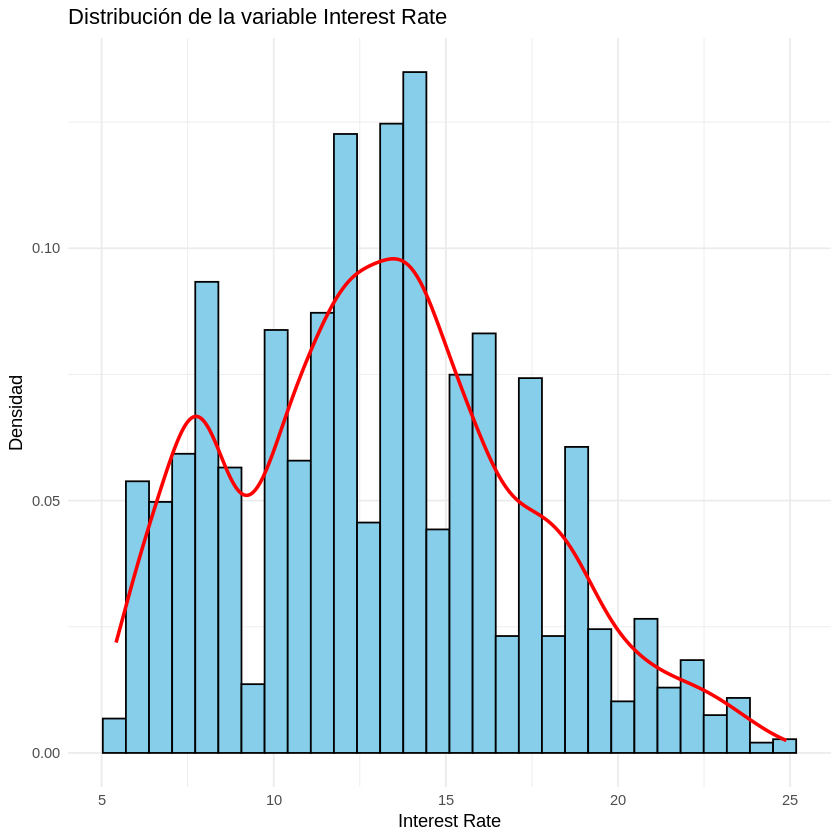

In [ ]:
ggplot(df_final, aes(x = Interest_Rate)) +
  geom_histogram(aes(y = after_stat(density)), bins = 30, fill = "skyblue", color = "black") +
  geom_density(color = "red", linewidth = 1) +
  labs(title = "Distribución de la variable Interest Rate",
       x = "Interest Rate",
       y = "Densidad") +
  theme_minimal()


In [ ]:
# 1. Separar en train/test
set.seed(123)
split_index <- createDataPartition(df_final$Interest_Rate, p = 0.7, list = FALSE)
train <- df_final[split_index, ]
test <- df_final[-split_index, ]

# 2. Variables dependientes e independientes
y_train <- train$Interest_Rate
X_train <- train[, setdiff(names(train), "Interest_Rate")]

y_test <- test$Interest_Rate
X_test <- test[, setdiff(names(test), "Interest_Rate")]

# 3. Agregar constante si usas glmnet o matrices manuales (opcional en lm)
X_train <- cbind(Intercept = 1, X_train)
X_test <- cbind(Intercept = 1, X_test)


In [ ]:
# Convertir Interest_Rate en fórmula
formula <- as.formula("Interest_Rate ~ .")

# Ajustar modelo completo con todas las variables
full_model <- lm(formula, data = train)

# Selección stepwise con ambos pasos (hacia adelante y hacia atrás)
stepwise_model <- stepAIC(full_model, direction = "both", trace = TRUE)

# Resumen del modelo final
summary(stepwise_model)

Start:  AIC=2037.77
Interest_Rate ~ Amount.Requested + Amount.Funded.By.Investors + 
    Loan.Length + Debt.To.Income.Ratio + Monthly.Income + Open.CREDIT.Lines + 
    Revolving.CREDIT.Balance + Inquiries.in.the.Last.6.Months + 
    Employment.Length + Max_Fic + Fico_Mean + Loan.Purposecredit_card + 
    Loan.Purposedebt_consolidation + Loan.Purposeeducational + 
    Loan.Purposehome_improvement + Loan.Purposehouse + Loan.Purposemajor_purchase + 
    Loan.Purposemedical + Loan.Purposemoving + Loan.Purposeother + 
    Loan.Purposerenewable_energy + Loan.Purposesmall_business + 
    Loan.Purposevacation + Loan.Purposewedding + Home.OwnershipOTHER + 
    Home.OwnershipOWN + Home.OwnershipRENT


Step:  AIC=2037.77
Interest_Rate ~ Amount.Requested + Amount.Funded.By.Investors + 
    Loan.Length + Debt.To.Income.Ratio + Monthly.Income + Open.CREDIT.Lines + 
    Revolving.CREDIT.Balance + Inquiries.in.the.Last.6.Months + 
    Employment.Length + Max_Fic + Loan.Purposecredit_card + Loan.Purpos


Call:
lm(formula = Interest_Rate ~ Amount.Requested + Amount.Funded.By.Investors + 
    Loan.Length + Monthly.Income + Open.CREDIT.Lines + Revolving.CREDIT.Balance + 
    Inquiries.in.the.Last.6.Months + Max_Fic + Loan.Purposecredit_card + 
    Loan.Purposedebt_consolidation + Loan.Purposeeducational + 
    Loan.Purposemoving + Loan.Purposeother + Loan.Purposewedding + 
    Home.OwnershipOTHER + Home.OwnershipOWN + Home.OwnershipRENT, 
    data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6283 -1.2413 -0.1845  1.1266  8.8675 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     7.382e+01  1.223e+00  60.386  < 2e-16 ***
Amount.Requested                7.615e-05  2.616e-05   2.911  0.00366 ** 
Amount.Funded.By.Investors      1.119e-04  2.571e-05   4.354 1.43e-05 ***
Loan.Length                     1.315e-01  5.584e-03  23.553  < 2e-16 ***
Monthly.Income                 -3.873e-05  2.301e-05  -1.683  

In [ ]:
# Ajustar modelo final con las variables seleccionadas
final_model <- lm(Interest_Rate ~
                    Amount.Funded.By.Investors +
                    Amount.Requested +
                    Fico_Mean +
                    Home.OwnershipRENT +
                    Inquiries.in.the.Last.6.Months +
                    Loan.Length +
                    Loan.Purposecredit_card +
                    Loan.Purposedebt_consolidation +
                    Loan.Purposewedding +
                    Monthly.Income +
                    Open.CREDIT.Lines,
                  data = train)

# Mostrar resumen del modelo
summary(final_model)



Call:
lm(formula = Interest_Rate ~ Amount.Funded.By.Investors + Amount.Requested + 
    Fico_Mean + Home.OwnershipRENT + Inquiries.in.the.Last.6.Months + 
    Loan.Length + Loan.Purposecredit_card + Loan.Purposedebt_consolidation + 
    Loan.Purposewedding + Monthly.Income + Open.CREDIT.Lines, 
    data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6394 -1.2789 -0.1681  1.1611  8.8070 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     7.410e+01  1.194e+00  62.038  < 2e-16 ***
Amount.Funded.By.Investors      1.144e-04  2.571e-05   4.451 9.15e-06 ***
Amount.Requested                6.874e-05  2.596e-05   2.647 0.008198 ** 
Fico_Mean                      -9.610e-02  1.587e-03 -60.563  < 2e-16 ***
Home.OwnershipRENT              1.969e-01  1.036e-01   1.901 0.057549 .  
Inquiries.in.the.Last.6.Months  4.955e-01  4.981e-02   9.949  < 2e-16 ***
Loan.Length                     1.310e-01  5.591e-03  23.4

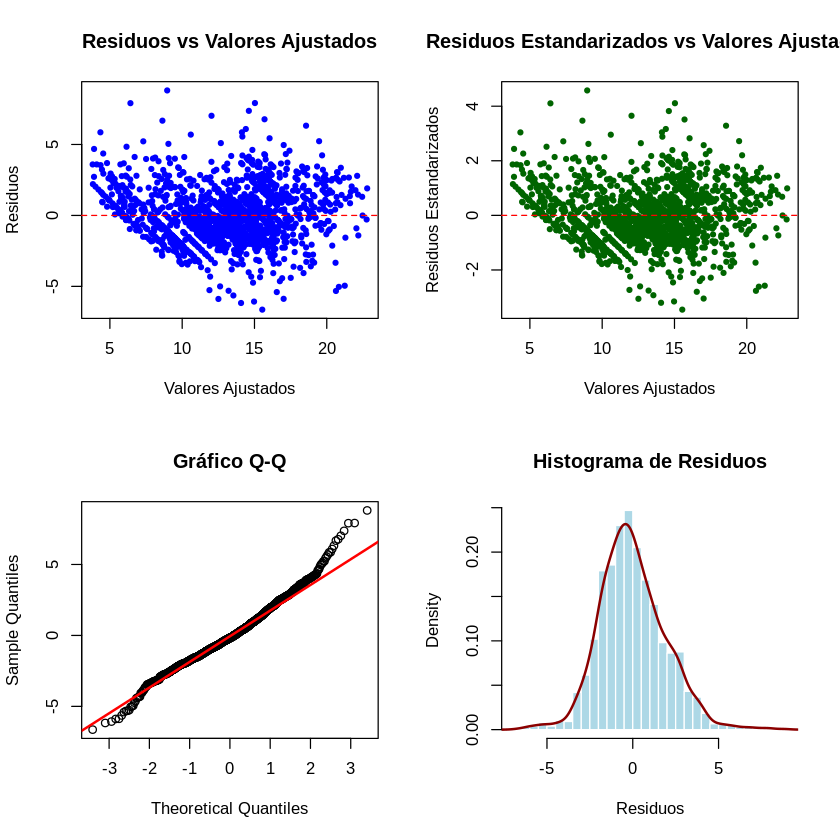

In [ ]:
# Obtener valores ajustados y residuos
y_pred <- final_model$fitted.values
residuals <- final_model$residuals
std_residuals <- rstandard(final_model)  # residuos estandarizados

# Configurar el espacio gráfico
par(mfrow = c(2, 2))

# 1. Residuos vs Valores Ajustados
plot(y_pred, residuals,
     main = "Residuos vs Valores Ajustados",
     xlab = "Valores Ajustados", ylab = "Residuos",
     pch = 20, col = "blue")
abline(h = 0, col = "red", lty = 2)

# 2. Residuos Estandarizados vs Valores Ajustados
plot(y_pred, std_residuals,
     main = "Residuos Estandarizados vs Valores Ajustados",
     xlab = "Valores Ajustados", ylab = "Residuos Estandarizados",
     pch = 20, col = "darkgreen")
abline(h = 0, col = "red", lty = 2)

# 3. Gráfico Q-Q
qqnorm(residuals, main = "Gráfico Q-Q")
qqline(residuals, col = "red", lwd = 2)

# 4. Histograma de Residuos con densidad
hist(residuals, breaks = 30, probability = TRUE,
     main = "Histograma de Residuos",
     xlab = "Residuos", col = "lightblue", border = "white")
lines(density(residuals), col = "darkred", lwd = 2)

# Reset layout
par(mfrow = c(1, 1))


In [ ]:
# Instalar si no lo tienes
if(!require(lmtest)) install.packages("lmtest")
library(lmtest)

# Realizar la prueba de Breusch-Pagan
bp_test <- bptest(final_model)

# Mostrar los resultados
print(bp_test)

Loading required package: lmtest

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘lmtest’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric





	studentized Breusch-Pagan test

data:  final_model
BP = 13.169, df = 11, p-value = 0.2824



In [ ]:
summary(final_model)



Call:
lm(formula = Interest_Rate ~ Amount.Funded.By.Investors + Amount.Requested + 
    Fico_Mean + Home.OwnershipRENT + Inquiries.in.the.Last.6.Months + 
    Loan.Length + Loan.Purposecredit_card + Loan.Purposedebt_consolidation + 
    Loan.Purposewedding + Monthly.Income + Open.CREDIT.Lines, 
    data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6394 -1.2789 -0.1681  1.1611  8.8070 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     7.410e+01  1.194e+00  62.038  < 2e-16 ***
Amount.Funded.By.Investors      1.144e-04  2.571e-05   4.451 9.15e-06 ***
Amount.Requested                6.874e-05  2.596e-05   2.647 0.008198 ** 
Fico_Mean                      -9.610e-02  1.587e-03 -60.563  < 2e-16 ***
Home.OwnershipRENT              1.969e-01  1.036e-01   1.901 0.057549 .  
Inquiries.in.the.Last.6.Months  4.955e-01  4.981e-02   9.949  < 2e-16 ***
Loan.Length                     1.310e-01  5.591e-03  23.4

In [ ]:
# Prueba de Durbin-Watson para autocorrelación
durbinWatsonTest(final_model)


 lag Autocorrelation D-W Statistic p-value
   1    -0.002977479      2.005335   0.904
 Alternative hypothesis: rho != 0

*no hay autocorrelación en los residuos.*

In [ ]:
# Agregar los valores ajustados del modelo como nueva columna 'pred'
train$pred <- fitted(final_model)

# Mostrar las primeras 3 filas
head(train, 3)


,Amount.Requested,Amount.Funded.By.Investors,Loan.Length,Debt.To.Income.Ratio,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,Max_Fic,⋯,Loan.Purposeother,Loan.Purposerenewable_energy,Loan.Purposesmall_business,Loan.Purposevacation,Loan.Purposewedding,Home.OwnershipOTHER,Home.OwnershipOWN,Home.OwnershipRENT,Interest_Rate,pred
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,2800,2208.125,36,3.50,2166.67,13,1043.713,1,10,694,⋯,0,0,0,0,0,0,1,0,14.33,12.45945
7,16000,16000.000,60,11.27,4791.67,5,8474.000,0,10,669,⋯,0,0,0,0,0,0,0,1,22.47,19.93293
9,24000,23772.150,60,15.54,8333.33,18,40597.162,0,10,744,⋯,0,0,0,0,0,0,0,0,12.99,13.63372


In [ ]:
# Predecir sobre los datos de test
test$pred <- predict(final_model, newdata = test)

# Ver las primeras 6 filas
head(test, 6)


,Amount.Requested,Amount.Funded.By.Investors,Loan.Length,Debt.To.Income.Ratio,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,Max_Fic,⋯,Loan.Purposeother,Loan.Purposerenewable_energy,Loan.Purposesmall_business,Loan.Purposevacation,Loan.Purposewedding,Home.OwnershipOTHER,Home.OwnershipOWN,Home.OwnershipRENT,Interest_Rate,pred
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,25000,25000.00,60,27.56,8606.56,11,15210.000,3,10,724,⋯,0,0,0,0,0,0,0,0,18.49,17.108321
2,19750,19750.00,60,13.39,6737.50,14,19070.000,3,10,714,⋯,0,0,0,0,0,0,0,0,17.27,17.052508
4,28000,27950.00,36,19.62,7083.33,12,38194.000,1,10,714,⋯,0,0,0,0,0,0,0,0,16.29,14.468283
5,24250,17431.82,60,23.79,5833.33,6,31061.000,2,10,734,⋯,0,0,0,0,0,0,0,0,12.23,15.103245
6,5400,5375.00,36,6.27,3000.00,4,1043.713,2,10,779,⋯,0,0,1,0,0,0,0,1,8.90,5.947906
8,6400,6400.00,36,9.58,6400.00,11,12306.000,1,10,739,⋯,0,0,0,0,0,0,0,1,7.51,8.934420


In [ ]:
# MAPE - Error absoluto medio porcentual
MAPE_train <- round(mean(abs((train$Interest_Rate - train$pred) / train$Interest_Rate)) * 100, 2)
cat("MAPE_train:", MAPE_train, "%\n")

# MSE - Error cuadrático medio
MSE_train <- mean((train$Interest_Rate - train$pred)^2)
cat("MSE_train:", MSE_train, "\n")

# Correlación de Pearson
Corr_train <- cor(train$Interest_Rate, train$pred)
cat("Corr_train:", Corr_train, "\n")


MAPE_train: 12.65 %
MSE_train: 3.70787 
Corr_train: 0.8893624 


In [ ]:
train$Deciles <- ntile(train$pred, 10)


In [ ]:
# Agrupar por deciles y calcular los promedios
Decile_analysis_train <- train %>%
  group_by(Deciles) %>%
  summarise(
    Actual = mean(Interest_Rate, na.rm = TRUE),
    Predicted = mean(pred, na.rm = TRUE)
  ) %>%
  arrange(desc(Deciles))  # Ordenar de mayor a menor decil

print(Decile_analysis_train)


# A tibble: 10 × 3
   Deciles Actual Predicted
     <int>  <dbl>     <dbl>
 1      10  20.0      19.5 
 2       9  16.9      16.6 
 3       8  15.8      15.5 
 4       7  14.9      14.7 
 5       6  13.4      13.9 
 6       5  12.7      13.0 
 7       4  11.4      11.9 
 8       3   9.84     10.6 
 9       2   8.67      8.94
10       1   7.24      6.14


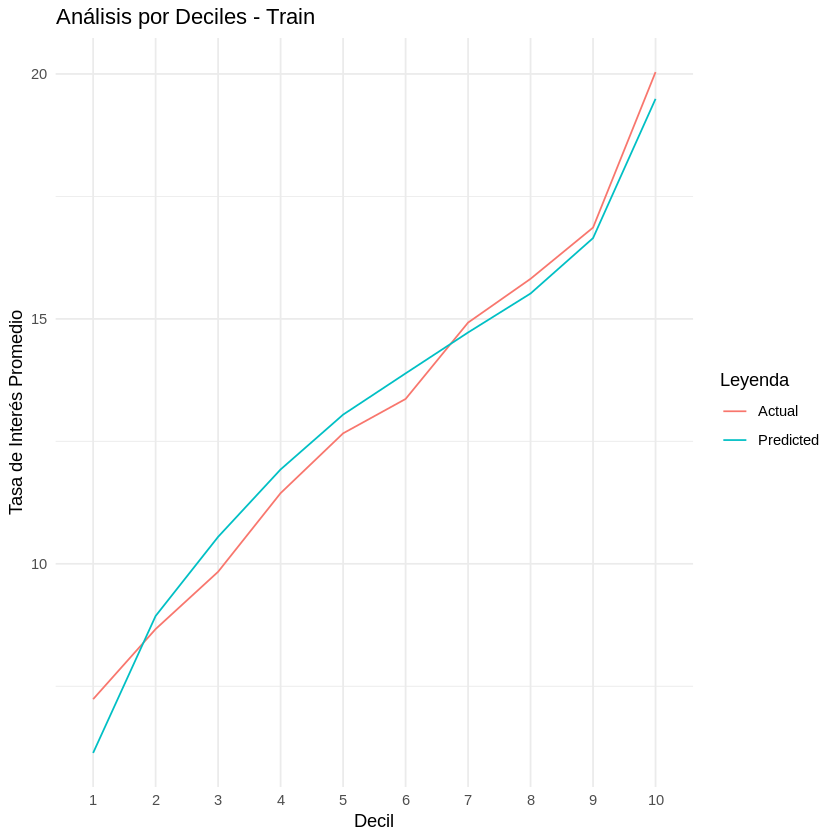

In [ ]:
ggplot(Decile_analysis_train, aes(x = as.factor(Deciles))) +
  geom_line(aes(y = Actual, color = "Actual", group = 1)) +
  geom_line(aes(y = Predicted, color = "Predicted", group = 1)) +
  labs(
    title = "Análisis por Deciles - Train",
    x = "Decil",
    y = "Tasa de Interés Promedio",
    color = "Leyenda"
  ) +
  theme_minimal()


In [ ]:
# Crear deciles en test
test <- test %>%
  mutate(Deciles = ntile(pred, 10))

# Calcular promedio por decil
Decile_analysis_test <- test %>%
  group_by(Deciles) %>%
  summarise(
    Actual = mean(Interest_Rate),
    Predicted = mean(pred)
  ) %>%
  arrange(desc(Deciles))  # Para orden descendente como en Python

# Ver resultado
print(Decile_analysis_test)

# A tibble: 10 × 3
   Deciles Actual Predicted
     <int>  <dbl>     <dbl>
 1      10  19.5      19.5 
 2       9  16.9      16.7 
 3       8  15.4      15.5 
 4       7  14.6      14.7 
 5       6  13.6      13.8 
 6       5  12.6      13.0 
 7       4  11.4      12.0 
 8       3   9.99     10.7 
 9       2   8.54      8.83
10       1   7.54      5.99


In [ ]:
# Calcular R² en test
rss <- sum((test$Interest_Rate - test$pred)^2)  # Residual Sum of Squares
tss <- sum((test$Interest_Rate - mean(test$Interest_Rate))^2)  # Total Sum of Squares

r2_test <- 1 - rss/tss
cat("R² Test:", round(r2_test, 4), "\n")


R² Test: 0.7751 


In [ ]:
# Número de observaciones
n <- nrow(test)

# Calcular RMSE manualmente
rmse_test <- sqrt(rss / n)
cat("RMSE Test:", round(rmse_test, 4), "\n")

RMSE Test: 1.9274 


# Reporte modelo inicial

- R² Entrenamiento: 0.791
El modelo explica aproximadamente el 79.1% de la variabilidad de la tasa de interés en los datos de entrenamiento.

- R² Test: 0.775
Buen desempeño en datos nuevos; indica que el modelo generaliza bien.

- MAPE (Train): 12.65%
Error porcentual medio razonable. El modelo predice con un error promedio del 12.65%, lo cual es aceptable en muchos contextos financieros.

- Correlación entre valores reales y predichos (Train): 0.889
Alta correlación → las predicciones siguen bien la tendencia de los datos reales.

- Prueba de Durbin-Watson: 2.005
Muy cerca de 2 → no hay autocorrelación en los residuos.

- Prueba de Breusch-Pagan: p-value ≈ 0.28
No se rechaza H₀ → no hay evidencia de heterocedasticidad.

- Normalidad de residuos:
El gráfico Q-Q y el histograma muestran una distribución razonablemente normal.

- Gráfico de residuos:
No se detecta patrón evidente. Aunque hay algo de dispersión, es aceptable para un modelo lineal.

- Significancia estadística:
Variables como Fico_Mean, Loan.Length, Monthly_Income, entre otras, resultaron altamente significativas (p < 0.05), lo que indica que tienen un impacto importante en la predicción de la tasa de interés.


**Conclusión Final**
Tiene buena precisión tanto con los datos de entrenamiento como con los de prueba, lo cual quiere decir que no solo "memoriza", sino que generaliza bien a nuevos casos.

Las predicciones se acercan bastante a los valores reales (error del 12% aprox.), y además no se detectan problemas serios con los residuos: no hay patrones raros, no hay ruido acumulado, y parecen distribuirse de forma normal. Eso habla de un modelo bien ajustado.


# Regularización

**Entrenamiento Modelo**

In [ ]:
library(glmnet)

# 1. Ridge Regression (alpha = 0)
set.seed(123)
cv_ridge <- cv.glmnet(as.matrix(X_train), y_train, alpha = 0, nfolds = 5)
best_lambda_ridge <- cv_ridge$lambda.min
model_ridge <- glmnet(as.matrix(X_train), y_train, alpha = 0, lambda = best_lambda_ridge)
cat("Mejor lambda para Ridge:", best_lambda_ridge, "\n")

# 2. Lasso Regression (alpha = 1)
set.seed(123)
cv_lasso <- cv.glmnet(as.matrix(X_train), y_train, alpha = 1, nfolds = 5)
best_lambda_lasso <- cv_lasso$lambda.min
model_lasso <- glmnet(as.matrix(X_train), y_train, alpha = 1, lambda = best_lambda_lasso)
cat("Mejor lambda para Lasso:", best_lambda_lasso, "\n")

# 3. Elastic Net (alpha = 0.5)
alpha_enet <- 0.5
set.seed(123)
cv_enet <- cv.glmnet(as.matrix(X_train), y_train, alpha = alpha_enet, nfolds = 5)
best_lambda_enet <- cv_enet$lambda.min
model_enet <- glmnet(as.matrix(X_train), y_train, alpha = alpha_enet, lambda = best_lambda_enet)
cat("Mejor lambda para Elastic Net (alpha =", alpha_enet, "):", best_lambda_enet, "\n")


Mejor lambda para Ridge: 0.3056588 
Mejor lambda para Lasso: 0.02207104 
Mejor lambda para Elastic Net (alpha = 0.5 ): 0.04022061 


**Evaluacion Modelos**

In [ ]:
library(Metrics)

# Función para calcular R²
r2_score <- function(actual, predicted) {
  cor(actual, predicted)^2
}

# Predicciones para cada modelo regularizado
pred_ridge <- predict(model_ridge, newx = as.matrix(X_test), s = best_lambda_ridge)
pred_lasso <- predict(model_lasso, newx = as.matrix(X_test), s = best_lambda_lasso)
pred_enet  <- predict(model_enet,  newx = as.matrix(X_test), s = best_lambda_enet)

# Aplanar predicciones (matrices a vectores)
pred_ridge <- as.vector(pred_ridge)
pred_lasso <- as.vector(pred_lasso)
pred_enet  <- as.vector(pred_enet)

# Cálculo de RMSE para cada modelo
rmse_ridge <- rmse(y_test, pred_ridge)
rmse_lasso <- rmse(y_test, pred_lasso)
rmse_enet  <- rmse(y_test, pred_enet)

# Cálculo de R² para cada modelo
r2_ridge <- r2_score(y_test, pred_ridge)
r2_lasso <- r2_score(y_test, pred_lasso)
r2_enet  <- r2_score(y_test, pred_enet)

# Imprimir resultados
cat("Modelo Ridge:\n")
cat("RMSE:", rmse_ridge, "\n")
cat("R²:  ", r2_ridge, "\n\n")

cat("Modelo Lasso:\n")
cat("RMSE:", rmse_lasso, "\n")
cat("R²:  ", r2_lasso, "\n\n")

cat("Modelo Elastic Net (alpha =", alpha_enet, "):\n")
cat("RMSE:", rmse_enet, "\n")
cat("R²:  ", r2_enet, "\n\n")


Modelo Ridge:
RMSE: 1.924196 
R²:   0.7762585 

Modelo Lasso:
RMSE: 1.928513 
R²:   0.7763338 

Modelo Elastic Net (alpha = 0.5 ):
RMSE: 1.927922 
R²:   0.7763746 



**Comparación de Resultados**

In [ ]:
cat("===== Comparación de Modelos =====\n")
cat("Modelo Lineal (sin regularización): RMSE =", rmse_test, ", R² =", r2_test, "\n")
cat("Ridge:       RMSE =", rmse_ridge, ", R² =", r2_ridge, "\n")
cat("Lasso:       RMSE =", rmse_lasso, ", R² =", r2_lasso, "\n")
cat("Elastic Net: RMSE =", rmse_enet, ", R² =", r2_enet, "\n")


===== Comparación de Modelos =====
Modelo Lineal (sin regularización): RMSE = 1.927432 , R² = 0.7751474 
Ridge:       RMSE = 1.924196 , R² = 0.7762585 
Lasso:       RMSE = 1.928513 , R² = 0.7763338 
Elastic Net: RMSE = 1.927922 , R² = 0.7763746 


El menor RMSE es del modelo Ridge, sin embargo el R2 más grande pertenence al Modelo Elastic Net

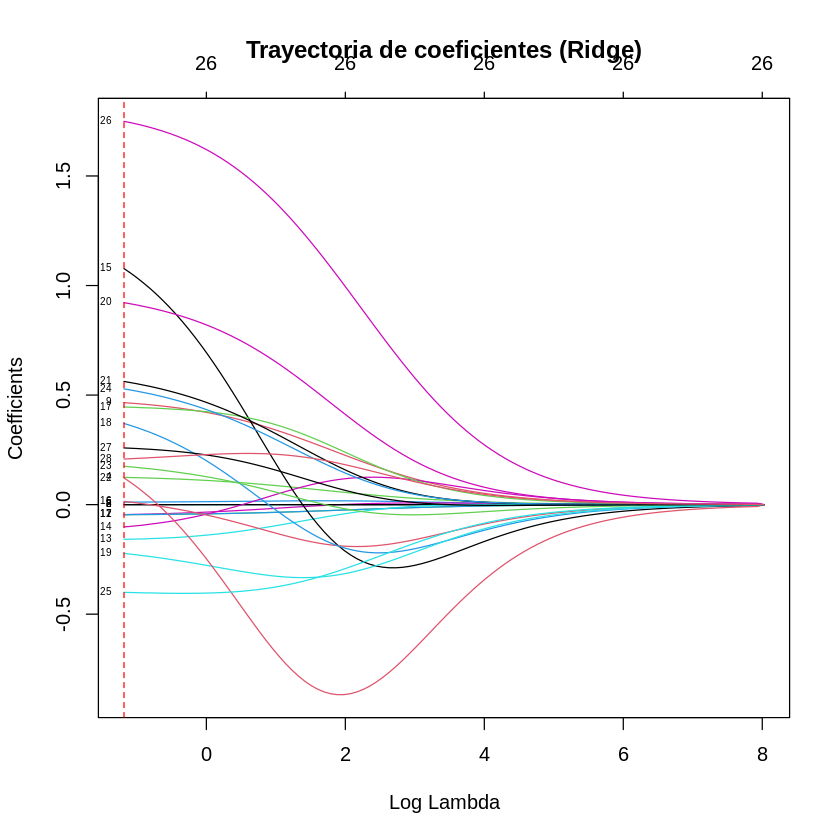

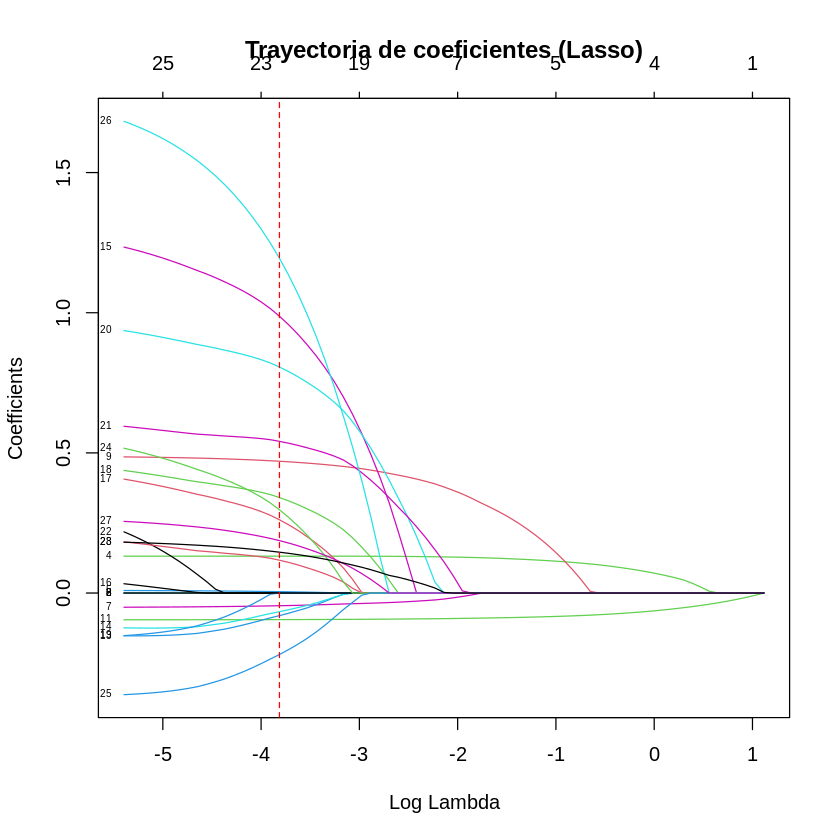

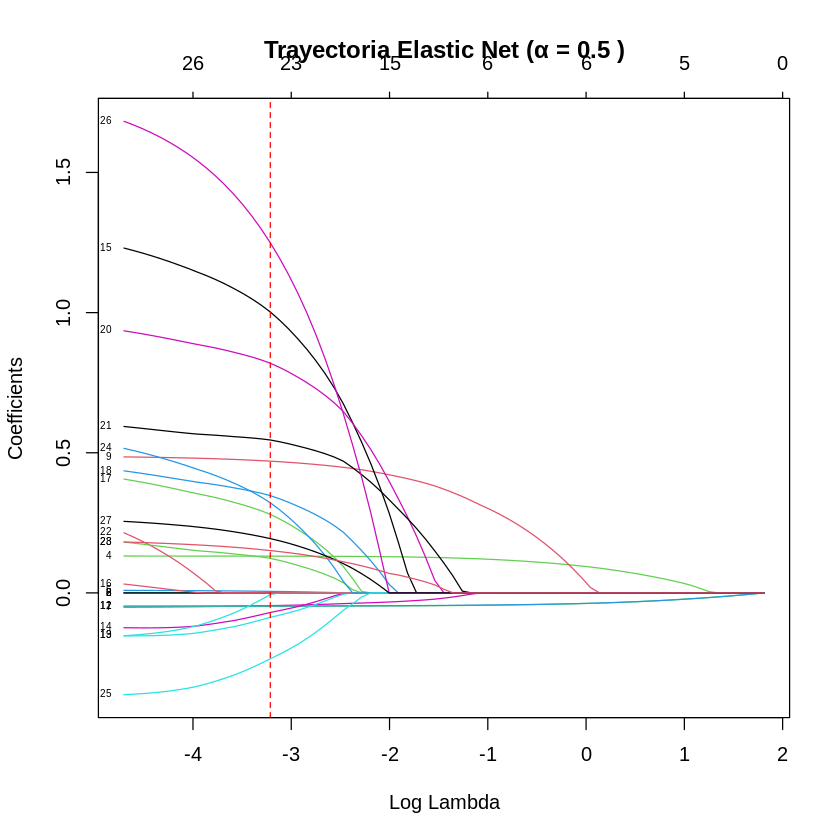

In [ ]:

plot(cv_ridge$glmnet.fit, xvar = "lambda", label = TRUE,
     main = "Trayectoria de coeficientes (Ridge)")
abline(v = log(best_lambda_ridge), col = "red", lty = 2)

plot(cv_lasso$glmnet.fit, xvar = "lambda", label = TRUE,
     main = "Trayectoria de coeficientes (Lasso)")
abline(v = log(best_lambda_lasso), col = "red", lty = 2)

plot(cv_enet$glmnet.fit, xvar = "lambda", label = TRUE,
     main = paste("Trayectoria Elastic Net (α =", alpha_enet, ")"))
abline(v = log(best_lambda_enet), col = "red", lty = 2)





# Conclusión

La regularización fue útil para afinar el modelo, aunque el desempeño no cambió drásticamente. Todos los métodos (Ridge, Lasso y Elastic Net) ofrecieron métricas similares al modelo lineal original, pero con ciertas ventajas importantes:
- **Estabilidad del modelo**: Ridge estabilizó los coeficientes sin eliminar variables, ideal para cuando hay multicolinealidad.
- **Simplicidad interpretativa**: Lasso redujo algunos coeficientes a cero, ayudando a identificar variables menos relevantes. Esto puede facilitar la interpretación del modelo.
- **Balance entre ambos mundos**: Elastic Net combinó los beneficios de Ridge y Lasso, aunque en tu caso no tuvo un desempeño mucho mejor que los otros dos.


Ademas, aunque la mejora en RMSE y R² fue pequeña, la regularización refuerza la robustez del modelo frente a sobreajuste y ofrece alternativas para controlar la complejidad según las prioridades (precisión vs interpretabilidad)

# Costos

La fórmula general para el modelo de Ridge es la siguiente:


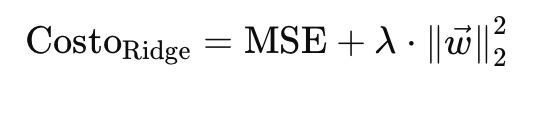


MSE (Error cuadrático medio)

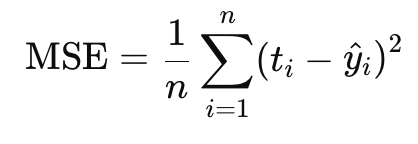

Norma L2 de los coeficientes (regularización):
El segundo término de la ecuación general, es la penalización por la magnitud de los coeficientes del modelo. La norma L2 (o la suma de los cuadrados de los coeficientes) se define como:

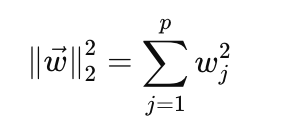

# Función de Costo Final:
ustituyendo el valor de λ con el mejor lamda optenido en el modelo, el cual el valor es:0.3056588, la función de costo para el modelo de Ridge es:

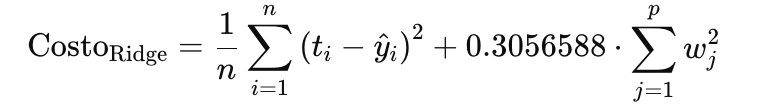